# The Cauchy problem

A differential-algebraic system of equations is given that describes the motion of a pendulum:

$m \ddot{x} = - x T / L$

$m \ddot{y} = - y T / L - m g$

$g = 9.81 + 0.05 sin(2 \pi t)$

$x^{2} + y^{2} = L^{2}$

    
Initial conditions:

$x_{0} = 3$

$y_{0} = -4$

$v_{0} = 1$

The system should be solved for [0, 2] and [0, 100] intervals.
Polar transformations of the system or elimination of the variable T are prohibited.

# Numerical solution

## Transforming the system

Let us introduce the notation for velocity projections:

$v_{x} = \dot{x}$

$v_{y} = \dot{y}$

Let's substitute the values into the system:

$\dot{v_{x}} = - x T / (mL)$

$\dot{v_{y}} = - y T / (mL) - g$

$g = 9.81 + 0.05 sin(2 \pi t)$

$x^{2} + y^{2} = L^{2}$

We differentiate the equation three times, substituting the introduced variables and values from other equations
in order to sequentially obtain first an expression for $T$, and then for $\dot{T}$:

1)

$x v_{x} + y v_{y} = 0$

2)

$T = m L (v_{x}^{2} + v_{y}^{2} - y g) / (x^{2} + y{2})$

3)

$\dot{T} = - m L (3 v_{y} g + \dot{g} y) / (x^{2} + y{2})$

Let us reduce the system to a system of ordinary differential equations by substituting values for $g$ and $\dot{g}$:

$\dot{x} = v_{x}$

$\dot{y} = v_{y}$

$\dot{v_{x}} = - x T / (mL)$

$\dot{v_{y}} = - y T / (mL) - (9.81 + 0.05 sin(2 \pi t))$

$\dot{T} = - m L (3 v_{y} (9.81 + 0.05 sin(2 \pi t)) + 0.1 \pi cos(2 \pi t) y) / (x^{2} + y{2})$

Based on the initial conditions for the coordinates and the fact that the pendulum velocity vector is always
directed perpendicular to the pendulum rod, we can find the initial conditions for $v_{x}$ and $v_{y}$:

$v_{x0} = -0.8$

$v_{y0} = -0.6$


## Imports

In [7]:
from math import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt

## Implementing fourth order Runge-Kutta (RK4) solver for the system

In [8]:
class Solver:
    
    # Initialization
    def __init__(self, max_time = 2.0, dt = 0.001):
        self.m = 1
        self.L = 5
        self.x0 = 3
        self.y0 = -4
        self.v0 = 1
        self.vx0 = -4/5
        self.vy0 = -3/5
        self.g0 = 9.81
        self.T0 = self.m * (self.v0 * self.v0 - self.y0 * self.g0) / self.L
        self.t0 = 0.0
        self.t_end = max_time
        self.dt = dt
        self.sample_count = int(self.t_end / self.dt)
        self.data = np.array([self.x0, self.y0, self.vx0, self.vy0, self.T0])
        self.values = np.zeros([5, self.sample_count])
        self.values[:,0] = self.data
        self.radius = np.zeros([self.sample_count])
        self.radius[0] = np.sqrt(self.x0**2 + self.y0**2)
        self.time = np.zeros([self.sample_count])
    
    # A method returning the right side of the differential equations
    def f(self, t, data, m, L):
        g = 9.81 + 0.05 * sin(2 * pi * t)
        g_ = 0.1 * pi * cos(2 * pi * t)
        x, y, vx, vy, T = data
        return np.array([vx,
                         vy,
                         - x * T / (m * L),
                         - y * T / (m * L) - g,
                         - (3 * vy * g + g_ * y) * m * L / (x**2 + y**2)
                        ])
        
    # A method solving the system using RK4
    def solve(self):
        for count in range(0, self.sample_count - 1):
            t = self.dt * count
            self.time[count] = t
            self.data = self.values[:,count]
            K1 = self.f(t, self.data, self.m, self.L)
            K2 = self.f(t + 0.5 * self.dt, self.data + 0.5 * self.dt * K1, self.m, self.L)
            K3 = self.f(t + 0.5 * self.dt, self.data + 0.5 * self.dt * K2, self.m, self.L)
            K4 = self.f(t + self.dt, self.data + self.dt * K3, self.m, self.L)
            self.data = self.data + self.dt * (K1 + 2 * K2 + 2 * K3 + K4) / 6.0
            self.radius[count + 1] = np.sqrt(self.data[0] * self.data[0] + self.data[1] * self.data[1])
            self.values[:, count + 1] = self.data
            self.time[count + 1] = t + self.dt
            
    # A method to print and save diagrams
    def diagrams(self, filename = None):
        plt.figure(figsize=(10,5))
        plt.subplot(3,1,1)
        plt.plot(self.time, self.values.T[:, 0], label=['x'])
        plt.plot(self.time, self.values.T[:, 1], label=['y'])
        plt.plot(self.time, self.radius.T, label=['R'])
        plt.xlabel('Time')
        plt.legend()
        plt.subplot(3,1,2)
        plt.plot(self.time, self.values.T[:, 2], label=['vx'])
        plt.plot(self.time, self.values.T[:, 3], label=['vy'])
        plt.xlabel('Time')
        plt.legend()
        plt.subplot(3,1,3)
        plt.plot(self.time, self.values.T[:, 4], label=['T'])
        plt.xlabel('Time')
        plt.legend()
        if filename != None:
            plt.savefig(filename, dpi=600)
        plt.show()

## Solve the system for the [0, 2] interval

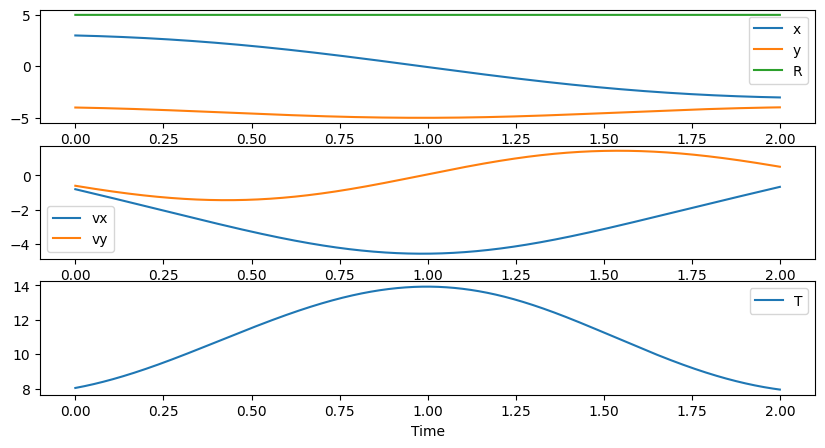

In [9]:
solver2 = Solver(2, 0.001)
solver2.solve()
solver2.diagrams("images/time2.png")

## Solve the system for the [0, 100] interval

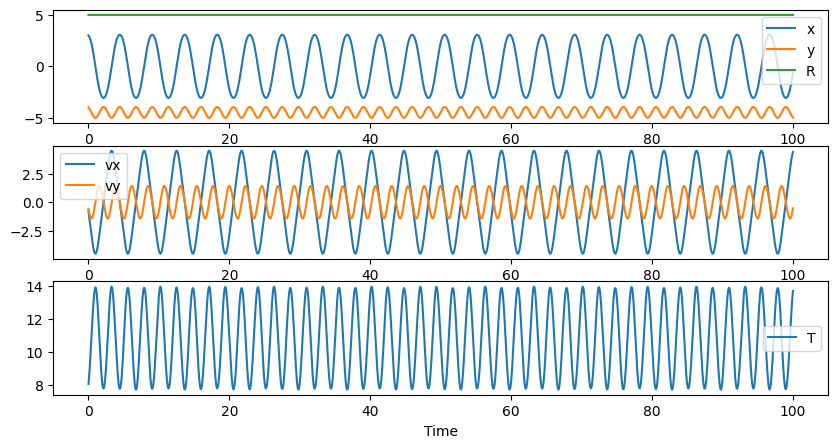

In [10]:
solver100 = Solver(100, 0.01)
solver100.solve()
solver100.diagrams("images/time100.png")

# Validation

In [11]:
from gekko import GEKKO
import numpy as np
from math import sqrt

class Validator:
    
    # Initialization and solving the initial system using GEKKO optimization package
    def __init__(self, max_time = 2.0, dt = 0.001):
        mass = 1
        g0 = 9.81
        s0 = 5
        v0 = 1
        y0 = -4

        m = GEKKO()
        x = m.Var(3)
        y = m.Var(y0)
        v = m.Var(-4/5)
        w = m.Var(-3/5)
        T = m.Var(mass * (v0**2 - y0 * g0) / s0)
        g = m.Var(g0)
        t = m.Var(0)

        m.Equation(g == 9.81 + 0.05 * m.sin(2 * np.pi * t))
        m.Equation(s0**2 == x**2 + y**2)
        m.Equation(t.dt()==1)

        m.Equation(x.dt()==v)
        m.Equation(y.dt()==w)
        m.Equation(v.dt()==-x*T/(s0 * mass))
        m.Equation(w.dt()==-g - y*T/(s0 * mass))

        m.time = np.linspace(0, max_time, int(max_time / dt), endpoint=False)
        m.options.IMODE=7
        m.options.NODES=5
        m.solve(disp=False)
        self.m = m
        self.x = x
        self.y = y
        self.v = v
        self.w = w
        self.T = T
    
    # A method to validate data
    def validate(self, x, y):
        RMSEx = np.sqrt(((x - self.x.value) ** 2).mean())
        RMSEy = np.sqrt(((x - self.x.value) ** 2).mean())
        return (RMSEx, RMSEy)

    # A method to print and save diagrams
    def diagrams(self, filename = None):
        plt.figure(figsize=(10,5))
        plt.subplot(3,1,1)
        R = [sqrt(xv * xv + yv * yv) for xv, yv in zip(list(self.x.value), list(self.y.value))]
        plt.plot(self.m.time, R, label='R')
        plt.plot(self.m.time, self.x.value,label='x')
        plt.plot(self.m.time, self.y.value,label='y')
        plt.xlabel('Time')
        plt.legend();
        plt.subplot(3,1,2)
        plt.plot(self.m.time,self.v.value,label='v')
        plt.plot(self.m.time,self.w.value,label='w')
        plt.xlabel('Time')
        plt.legend();
        plt.subplot(3,1,3)
        plt.plot(self.m.time,self.T.value,label='T')
        plt.xlabel('Time')
        plt.legend();
        if filename != None:
            plt.savefig(filename, dpi=600)
        plt.show()    

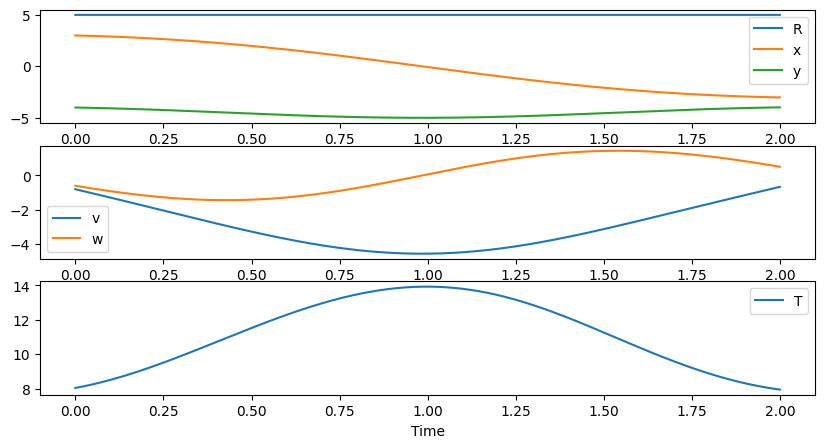

RMSEx: 5.109236694142193e-08  RMSEy: 5.109236694142193e-08


In [13]:
validator2 = Validator(2, 0.001)
ex, ey = validator2.validate(solver2.values[0, :], solver2.values[1, :])
validator2.diagrams("images/time2_valid.png")
print("RMSEx:", ex, " RMSEy:", ey)

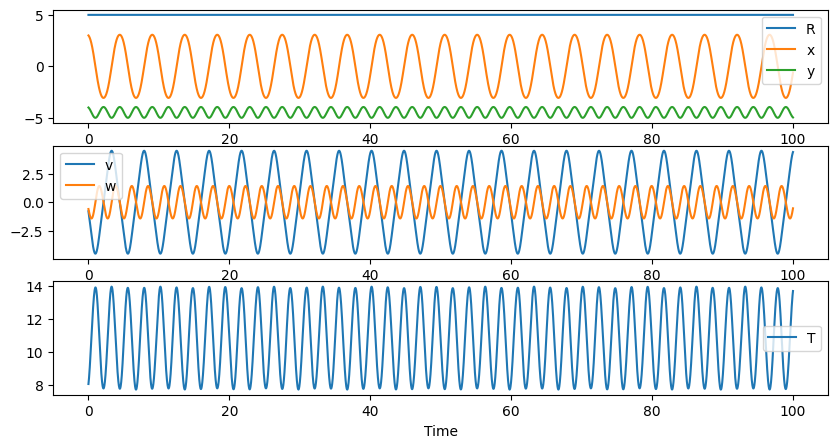

RMSEx: 1.6870170545374603e-06  RMSEy: 1.6870170545374603e-06


In [14]:
validator100 = Validator(100, 0.01)
ex, ey = validator100.validate(solver100.values[0, :], solver100.values[1, :])
validator100.diagrams("images/time100_valid.png")
print("RMSEx:", ex, " RMSEy:", ey)

# Make animation

In [12]:
time_step = 0.01
max_count = 5 / time_step
fig, ax = plt.subplots()
repeat_count = 4
for count in range(int(max_count * 0.25)):
    x = solver100.values[0, count * 4]
    y = solver100.values[1, count * 4]
    dx0 = x - solver100.values[0, 0]
    dy0 = y - solver100.values[1, 0]
    dx = x - solver100.values[0, count * 4 + 4]
    dy = y - solver100.values[1, count * 4 + 4]
    if dx0 * dx0 + dy0 * dy0 < dx * dx + dy * dy:
      repeat_count -= 1
      if repeat_count < 0:
          break
    circle = plt.Circle((x, y), 0.1, color='blue')
    ax.set_xlim([-3.5, 3.5])
    ax.set_ylim([-7, -2])
    ax.add_patch(circle)
    fig.savefig('images/pendulum' + str(count).zfill(3) + '.png')
    ax.cla()
plt.close()